## Read the feature selected  data frame via mutual information

In [2]:
import pandas as pd
import numpy as np
import time

np.random.seed(33)
df = pd.read_csv("../data/featureSelectedAllDataWithY.csv")
# df = pd.read_csv("../data/Cleaned_dat_encoded.csv")
print(df.shape)
df.head()

(534730, 21)


,esi,age,ethnicity,race,lang,maritalstatus,employstatus,insurance_status,arrivalmode,previousdispo,...,meds_analgesics,meds_antiplateletdrugs,meds_cardiacdrugs,meds_cardiovascular,meds_diuretics,meds_elect/caloric/h2o,meds_gastrointestinal,meds_psychotherapeuticdrugs,meds_vitamins,disposition
0,4,40,1,8,1,8,2,4,6,7,...,0,0,0,0,0,0,0,0,0,2
1,4,66,1,4,1,5,3,1,2,7,...,0,0,0,0,0,0,0,0,0,2
2,2,66,1,4,1,5,3,1,6,3,...,0,0,0,0,0,0,0,0,0,2
3,2,66,1,4,1,5,3,1,2,3,...,0,0,0,0,0,0,0,0,0,2
4,3,84,1,5,2,10,6,3,6,3,...,0,0,0,2,1,2,2,0,1,1


## Correlation analysis

In [3]:
health_data = df.copy()

feature_corr = health_data.corr()
feature_corr[abs(feature_corr['disposition']) > 0.1]['disposition']

esi                            0.431877
age                           -0.374109
race                          -0.136434
employstatus                  -0.135497
arrivalmode                    0.177370
previousdispo                  0.145210
htn                           -0.261439
meds_analgesics               -0.338007
meds_antiplateletdrugs        -0.333516
meds_cardiacdrugs             -0.308993
meds_cardiovascular           -0.441590
meds_diuretics                -0.317732
meds_elect/caloric/h2o        -0.308729
meds_gastrointestinal         -0.390537
meds_psychotherapeuticdrugs   -0.323160
meds_vitamins                 -0.348034
disposition                    1.000000
Name: disposition, dtype: float64

In [4]:
print(feature_corr[abs(feature_corr['disposition']) > 0.2]['disposition'])
print(len(feature_corr[abs(feature_corr['disposition']) > 0.2]['disposition']))

esi                            0.431877
age                           -0.374109
htn                           -0.261439
meds_analgesics               -0.338007
meds_antiplateletdrugs        -0.333516
meds_cardiacdrugs             -0.308993
meds_cardiovascular           -0.441590
meds_diuretics                -0.317732
meds_elect/caloric/h2o        -0.308729
meds_gastrointestinal         -0.390537
meds_psychotherapeuticdrugs   -0.323160
meds_vitamins                 -0.348034
disposition                    1.000000
Name: disposition, dtype: float64
13


## Read the feature selected columns for training

In [5]:
## Split the data into training and testing data
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25,shuffle=True)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 427784
No. of testing examples: 106946


In [6]:
from sklearn.preprocessing import StandardScaler
y_train = training_data['disposition']
y_test = testing_data['disposition']
X_train = StandardScaler().fit_transform(training_data.drop("disposition",axis = 1))
X_test = StandardScaler().fit_transform(testing_data.drop("disposition",axis = 1))


# y_train = np.array(y_train)
# y_test = np.array(y_test)
# X_train = np.array(X_train)
# X_test = np.array(X_test)
y_train = np.array(y_train)[:100]
y_test = np.array(y_test)[:10]
X_train = np.array(X_train)[:100,]
X_test = np.array(X_test)[:10,]

## Logistic Regression simple demo (Validate it could run)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
# Predicting the test set

y_pred = clf.predict(X_test)
# Making Confusion Matrix and calculating accuracy score

mylist = []
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[19723 13112]
 [ 3952 70159]]
0.8404428403119332


## 10 fold cross validation for the previous logistic regression model

In [11]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
health_data = df.copy()
X = StandardScaler().fit_transform(health_data.drop("disposition",axis = 1))
y = health_data["disposition"]
scores = cross_val_score(clf,X,y,cv=10)

In [12]:
print(np.mean(scores))

0.8378882800665757


## Various logistic regression model with different hyperparameters comparison

In [ ]:
# Train a classifier using Logistic Regression (LR) without regularization.  Logistic Regression produces linear models. We will try several variants of LR.
LR_vanilla = LogisticRegression(penalty='none').fit(X_train,y_train)

print("first finished")
# Train a classifier using Logistic Regression (LR) with l1 regularization, which is a form of embedded feature selection.
LR_l1 = LogisticRegression(penalty='l1',solver='saga',max_iter=5000).fit(X_train,y_train)
print("second finished")

# Train a classifier using Logistic Regression (LR) with l2 regularization.
LR_l2 = LogisticRegression(penalty='l2',solver='saga',max_iter=5000).fit(X_train,y_train)
print("Third finished")

# Train a classifier using Logistic Regression (LR) with elastic net regularization. Elastic net regularization is a combination of L1 and L2 regularization.
LR_en = LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=0.2,max_iter=5000).fit(X_train,y_train)
print("Forth finished")

## Confusion matrix

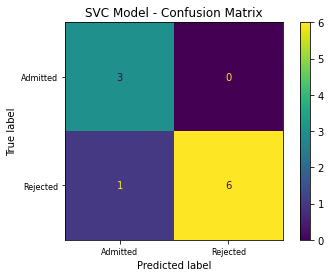

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(clf,X_test,y_test)
plt.title("SVC Model - Confusion Matrix")
plt.xticks(range(2), ["Admitted", "Rejected"], fontsize=8)
plt.yticks(range(2), ["Admitted", "Rejected"], fontsize=8)
plt.show()

## Precision Recall curve

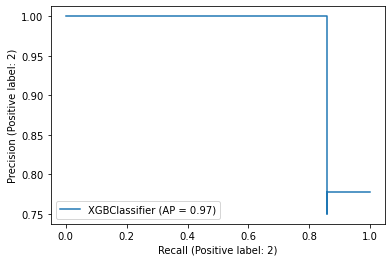

In [9]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
plot_precision_recall_curve(clf,X_test,y_test)

## ROC curve

In [ ]:
plot_roc_curve(clf,X_test,y_test)

## Quantative matrix

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score

print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))
print("Balanced Accuracy:" + format(balanced_accuracy_score(y_test,y_pred),'.2f'))
print("Matthews Corr Coef:" + format(matthews_corrcoef(y_test,y_pred),'.2f'))

              precision    recall  f1-score   support

          No       0.75      1.00      0.86         3
         Yes       1.00      0.86      0.92         7

    accuracy                           0.90        10
   macro avg       0.88      0.93      0.89        10
weighted avg       0.93      0.90      0.90        10

Balanced Accuracy:0.93
Matthews Corr Coef:0.80


## Visualize the feature importance function


In [11]:

def feature_plot(classifier, feature_names, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    middle_coefficient = np.argsort(coef)[top_features]
    top_coefficients = np.hstack([top_negative_coefficients, middle_coefficient, top_positive_coefficients])
    plt.figure(figsize=(18, 7))
    colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features+1), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(2 * top_features+1), feature_names[top_coefficients], rotation=45, ha='right')

    plt.show()

## Feature importance in Logistic regression

In [12]:
health_data = df.copy()
feature_plot(clf, health_data.drop(['disposition'], axis=1).columns.values)

AttributeError: Coefficients are not defined for Booster type None

## Learning curve

In [13]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

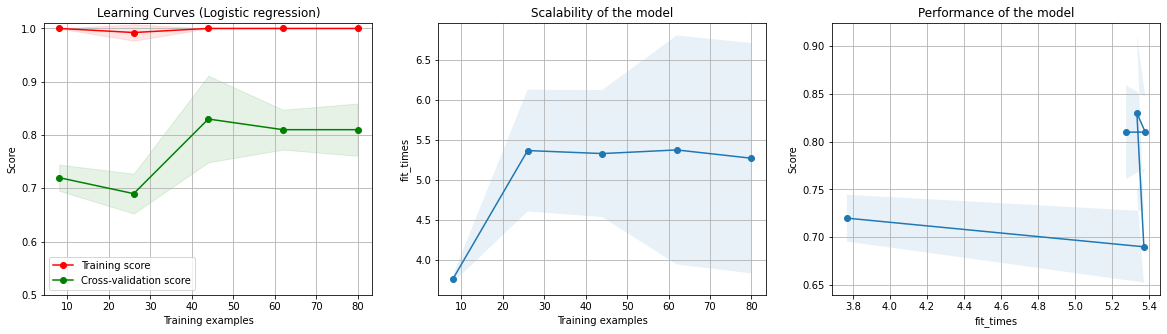

In [14]:
health_data = df.copy()

title = "Learning Curves (Logistic regression)"


## 会巨慢无比，千万别跑
plot_learning_curve(clf, title, X_train, y_train, ylim=(0.5, 1.01),
                     n_jobs=10)

plt.show()

# XGBoost

In [1]:
import pandas as pd
import numpy as np
import time


np.random.seed(33)
# df = pd.read_csv("../data/featureSelectedAllDataWithY.csv")
df = pd.read_csv("../data/Cleaned_dat_encoded.csv")
print(df.shape)
df.head()

(534730, 584)


,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
0,2,4,40,2,1,8,1,9,8,2,...,0,0,0,0,0,0,0,0,0,0
1,2,4,66,2,1,4,1,11,5,3,...,0,0,0,0,0,0,0,0,0,0
2,2,2,66,2,1,4,1,11,5,3,...,0,0,0,0,0,0,0,0,0,0
3,3,2,66,2,1,4,1,11,5,3,...,0,0,0,0,0,0,0,0,0,0
4,3,3,84,1,1,5,2,11,10,6,...,0,0,0,0,0,0,0,0,0,0


In [2]:
## Split the data into training and testing data
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25,shuffle=True)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 427784
No. of testing examples: 106946


In [3]:
from sklearn.preprocessing import StandardScaler
y_train = training_data['disposition']
y_test = testing_data['disposition']
X_train = StandardScaler().fit_transform(training_data.drop("disposition",axis = 1))
X_test = StandardScaler().fit_transform(testing_data.drop("disposition",axis = 1))

# y_train = np.array(y_train)
# y_test = np.array(y_test)
# X_train = np.array(X_train)
# X_test = np.array(X_test)
y_train = np.array(y_train)[:100]
y_test = np.array(y_test)[:10]
X_train = np.array(X_train)[:100,]
X_test = np.array(X_test)[:10,]


In [6]:
from xgboost import XGBClassifier

clf = XGBClassifier(n_estimators=1000, learning_rate=0.05,n_jobs=6)
# Add silent=True to avoid printing out updates with each cycle
clf.fit(X_train, y_train, verbose=True)

/Users/yuxuan/opt/anaconda3/envs/dp3.7/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:26:50] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)
# Making Confusion Matrix and calculating accuracy score

mylist = []
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[3 0]
 [1 6]]
0.9
